# 4、使用矩阵乘法将高维数据映射为低维数据

## 如何从高维到低维，从低维到高维

+ 原始特征矩阵乘以前 $k$ 个主成分构成的矩阵的转置，就得到一个低维度的矩阵

$$
X \cdot W_k^T
$$

+ 将低维度矩阵乘以前 $k$ 个主成分构成的矩阵（无需转置），就得到了高维度的矩阵，注意，这个过程 shape 还原了，但是原始矩阵的一些信息（包括噪声）也已经丢失了。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

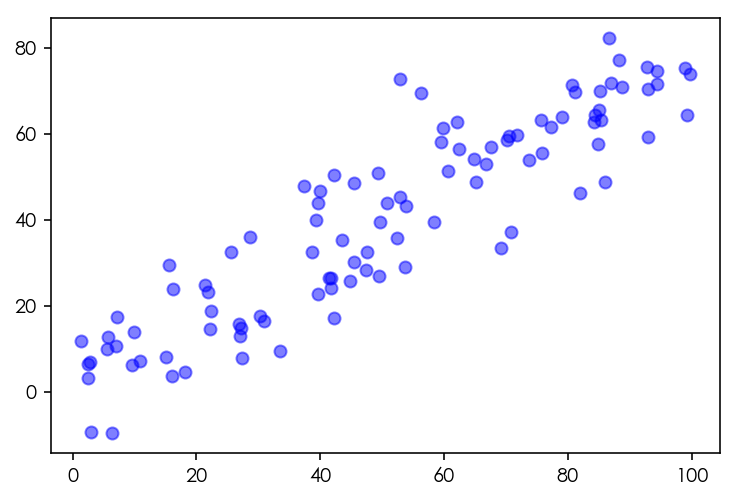

In [5]:
plt.scatter(X[:,0], X[:,1],color = 'b',alpha = 0.5)
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.components_

array([[-0.77891141, -0.62713397]])

In [8]:
pca.components_.shape

(1, 2)

我们设定的超参数 n_components = 1 ，每一个主成分有 2 个特征分量。

In [9]:
X_reduction = pca.transform(X)
# 恢复维度以后的特征矩阵
X_restore = pca.inverse_transform(X_reduction)

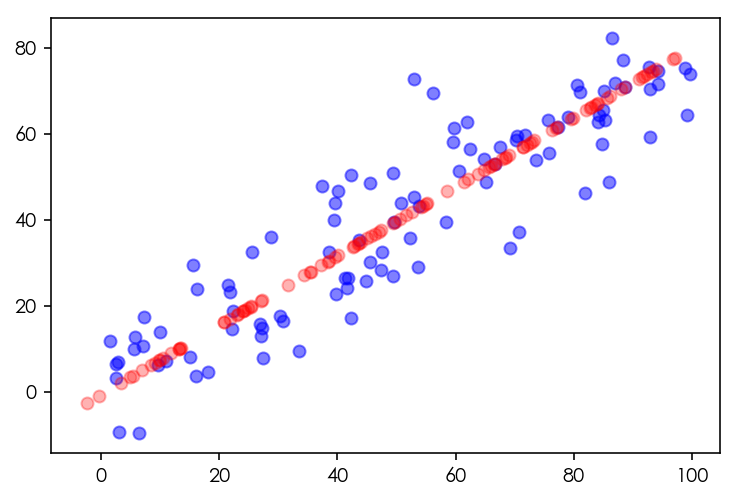

In [10]:
plt.scatter(X[:,0], X[:,1], color='b', alpha=0.5)
plt.scatter(X_restore[:,0], X_restore[:,1],color='r',alpha=0.3)
plt.show()

恢复维度以后，数据整齐地跑到一条直线上了，丢失的是噪音。